# Set Up


In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import pickle
from xgboost import XGBRegressor

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

# Load the data

In [300]:
data_test = pd.read_csv('Test.csv')
data_train = pd.read_csv('Train.csv')
data_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [301]:
data_train.shape

(8523, 12)

In [302]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [303]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [304]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [305]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data cleaning

In [306]:
data_train['Item_Weight'] =  data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean())
data_test['Item_Weight'] =  data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean())

In [307]:
data_train['Outlet_Size'] =  data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0])
data_test['Outlet_Size'] =  data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0])

In [308]:
data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [309]:
data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [310]:
data_train.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [311]:
data_test.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


# Visualization

Visualization of Categorial values Vs Numerical values

In [312]:
categorical_type=[col for col in data_train.columns if data_train[col].dtype=='O']
categorical_type=data_train[categorical_type]
categorical_type.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [313]:
categorical_type.drop('Item_Identifier', axis=1, inplace=True)
categorical_type.drop('Outlet_Identifier', axis=1, inplace=True)

In [314]:
categorical_type.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [315]:
categorical_type.isnull().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

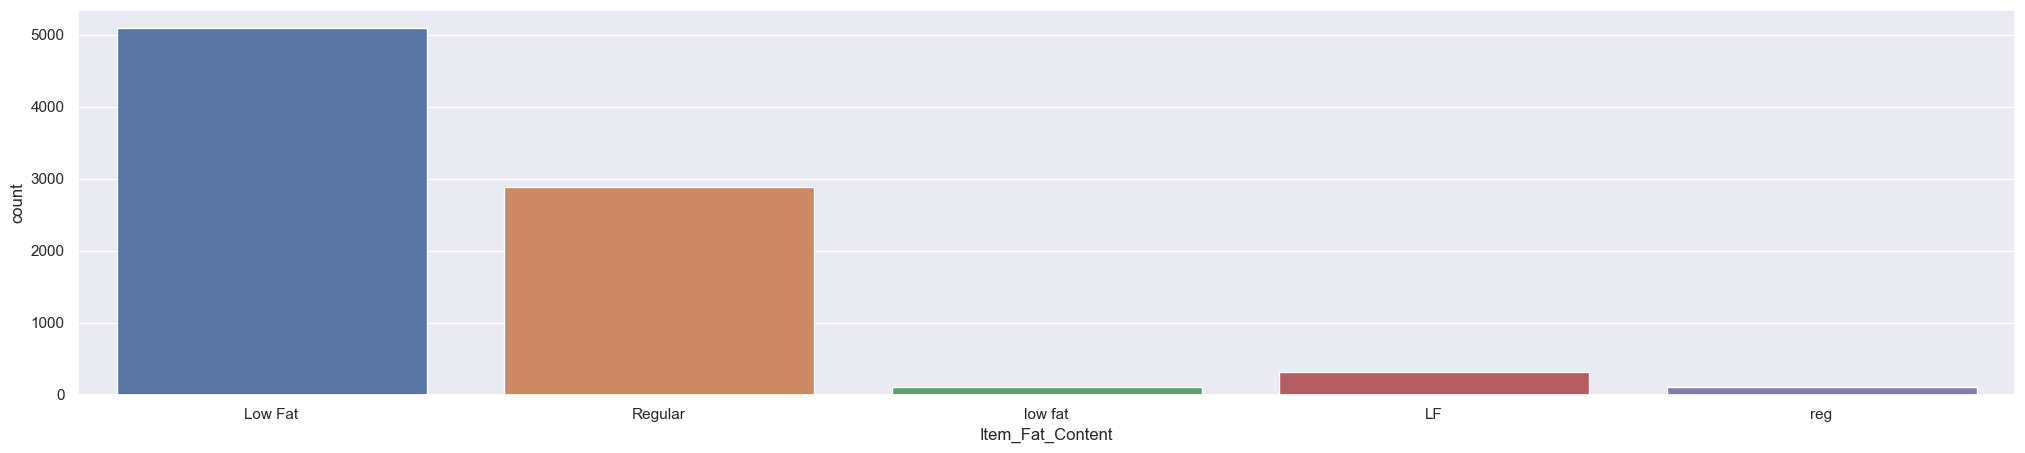

In [322]:
plt.figure(figsize=(25,5))
sns.countplot(categorical_type.Item_Fat_Content)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

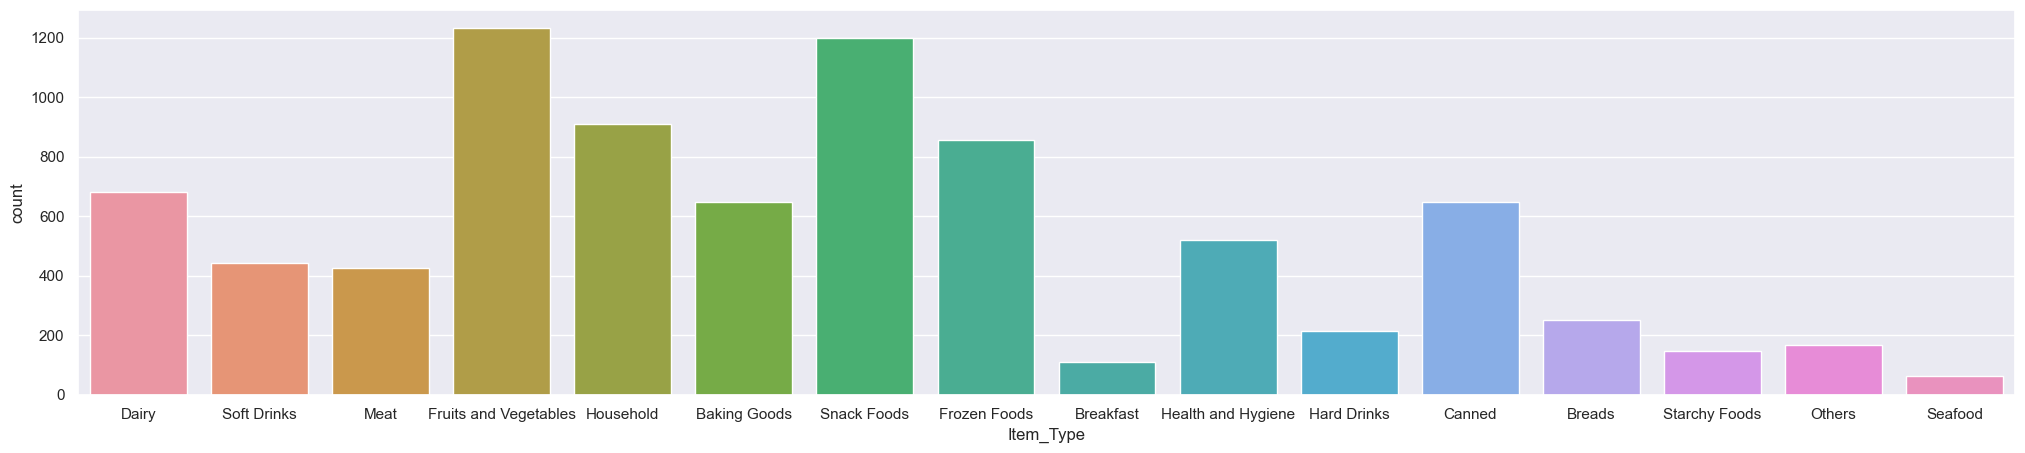

In [317]:
plt.figure(figsize=(25,5))
sns.countplot(categorical_type.Item_Type)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

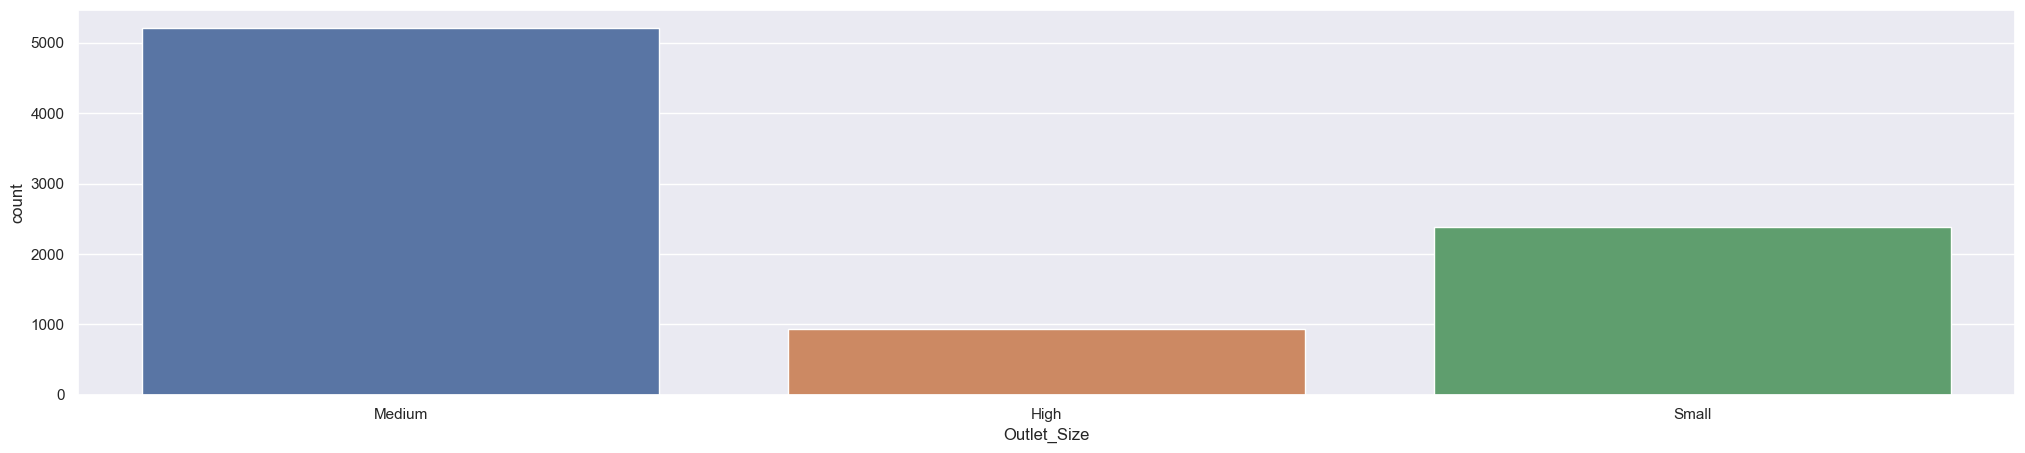

In [318]:
plt.figure(figsize=(25,5))
sns.countplot(categorical_type.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

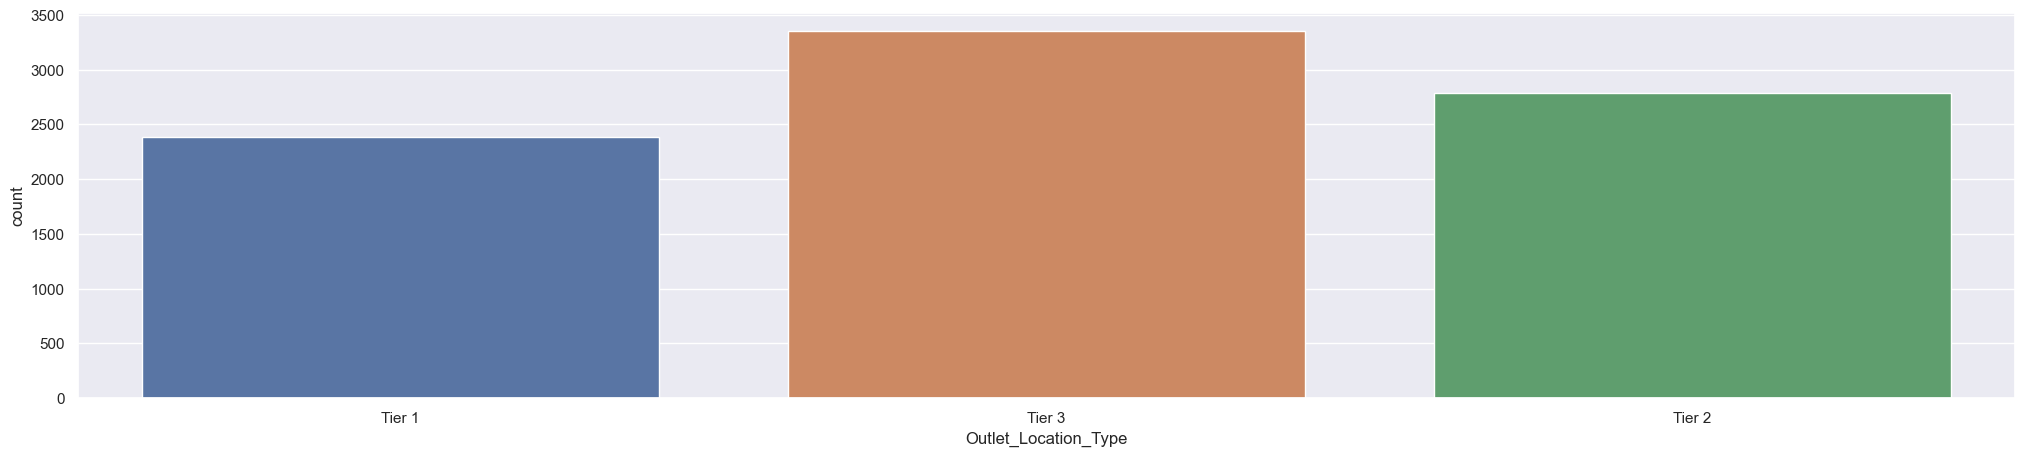

In [319]:
plt.figure(figsize=(25,5))
sns.countplot(categorical_type.Outlet_Location_Type)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

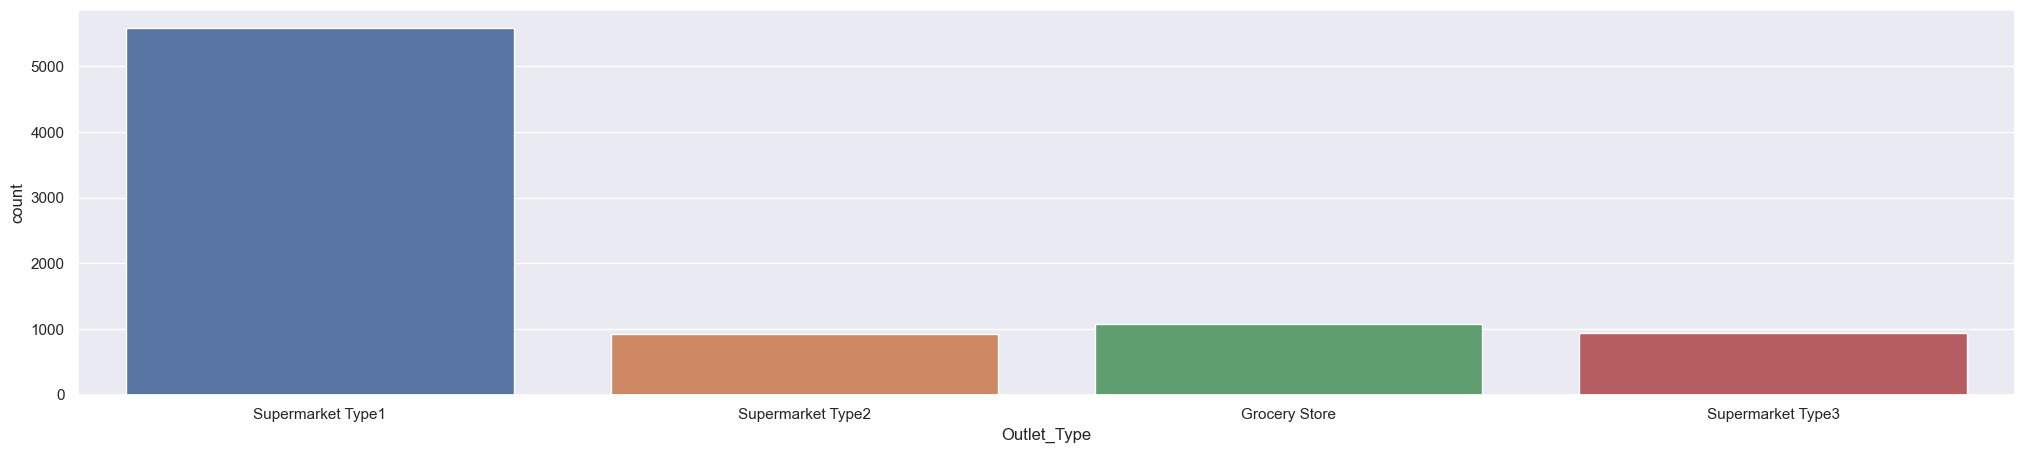

In [320]:
plt.figure(figsize=(25,5))
sns.countplot(categorical_type.Outlet_Type)

In [323]:
categorical_type.columns
col =['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
encoder = LabelEncoder()
def Label_Encoder(col):
  categorical_type[col] = encoder.fit_transform(categorical_type[col])
for i in ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']:
  Label_Encoder(i)
categorical_type.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,4,1,0,1
1,2,14,1,2,2
2,1,10,1,0,1
3,2,6,1,2,0
4,1,9,0,2,1


Visualization of Numerical values Vs Numerical Values 

In [324]:
Numerical_col = [col for col in data_train.columns if data_train[col].dtype != "O"]

In [325]:
data_train[Numerical_col].isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [326]:
Numerical_type = data_train[Numerical_col]
Numerical_type.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

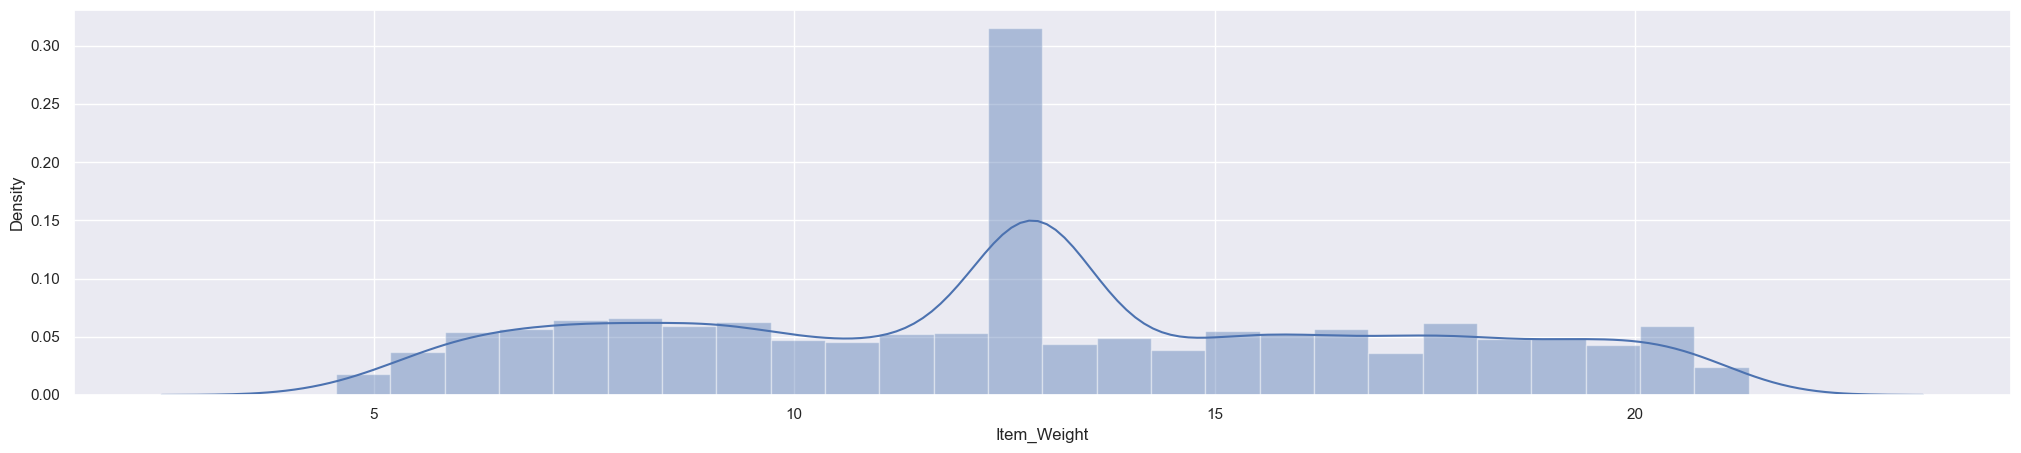

In [327]:
plt.figure(figsize=(25,5))
sns.distplot(Numerical_type.Item_Weight)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

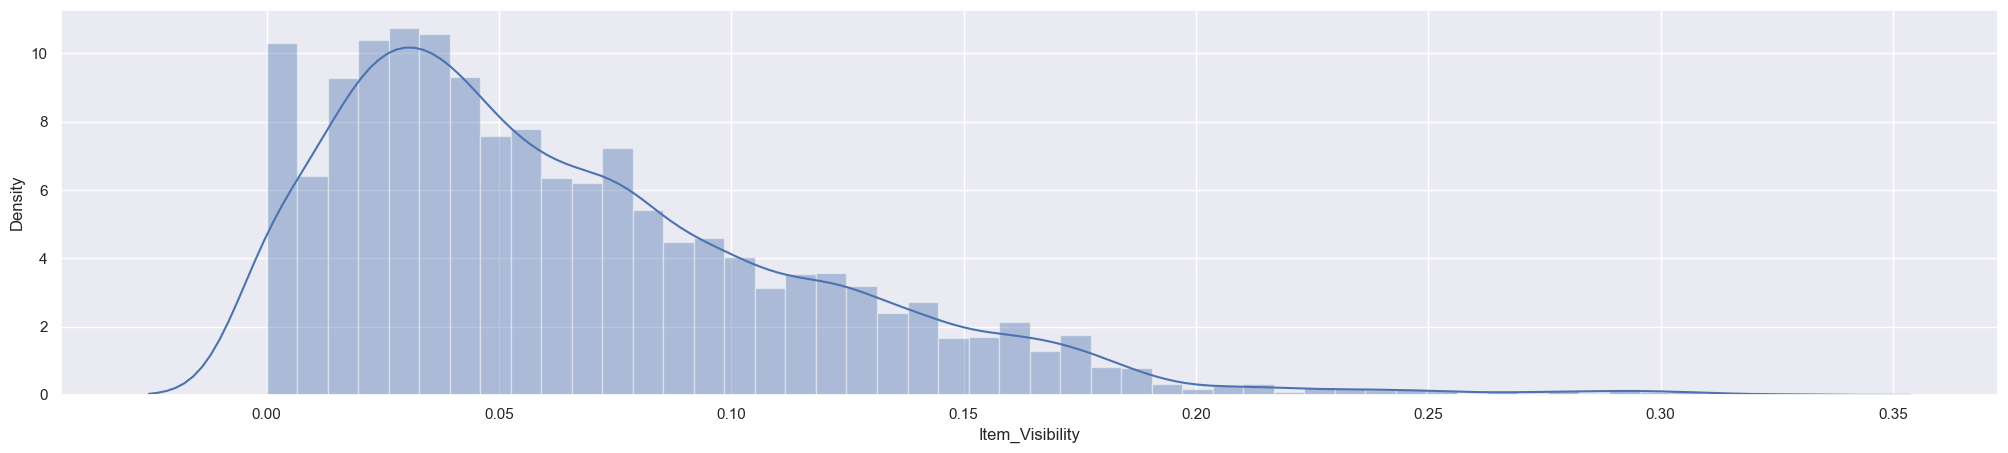

In [328]:
plt.figure(figsize=(25,5))
sns.distplot(Numerical_type.Item_Visibility)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

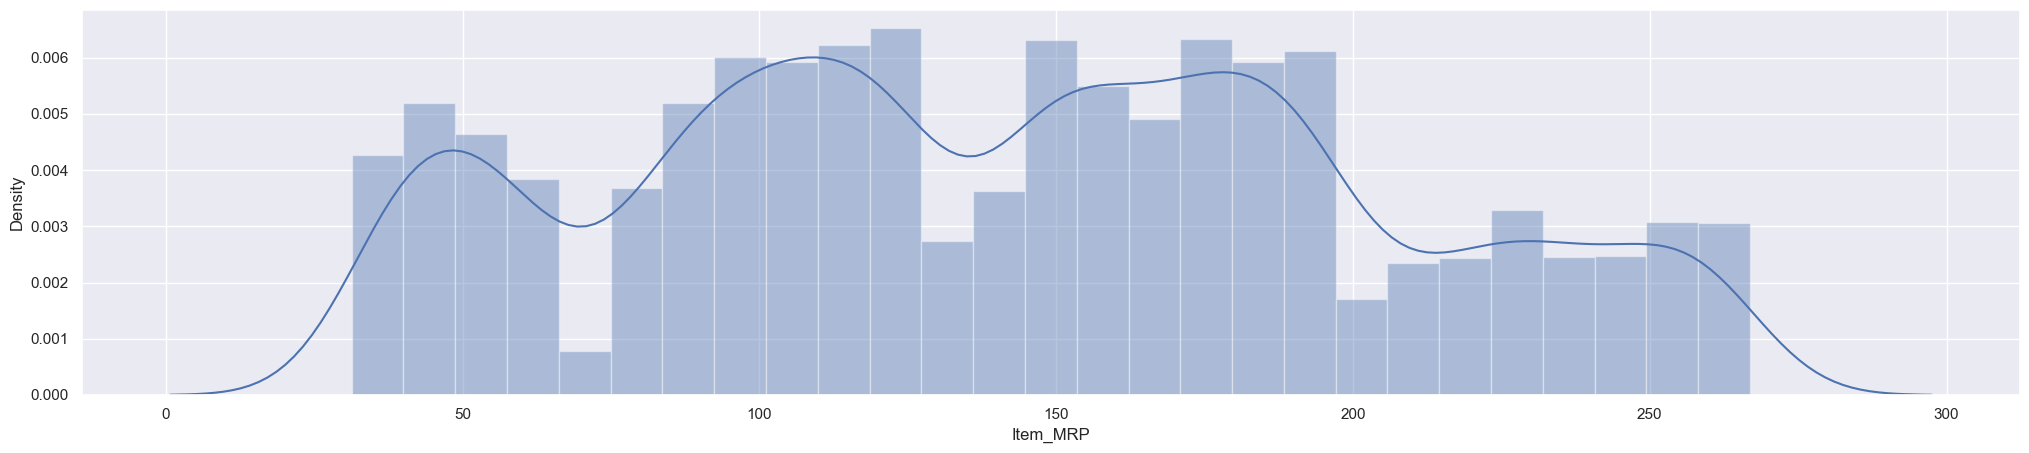

In [329]:
plt.figure(figsize=(25,5))
sns.distplot(Numerical_type.Item_MRP)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

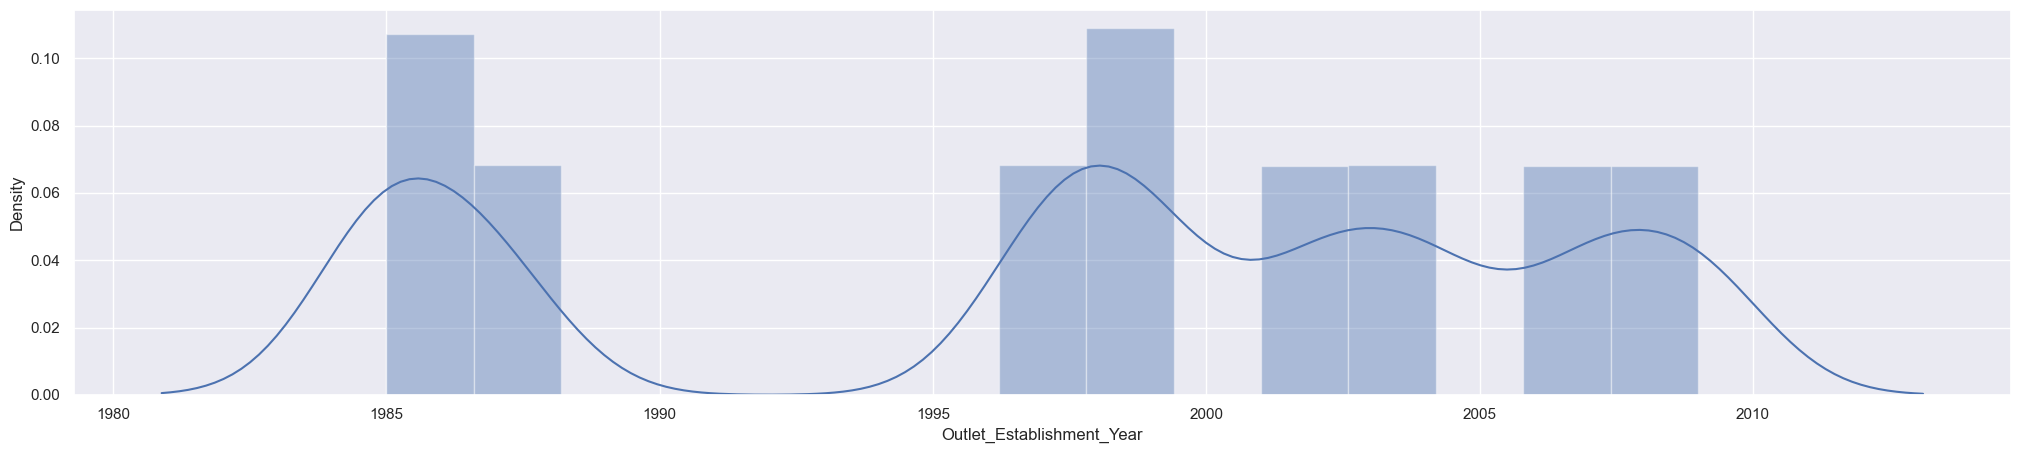

In [330]:
plt.figure(figsize=(25,5))
sns.distplot(Numerical_type.Outlet_Establishment_Year)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

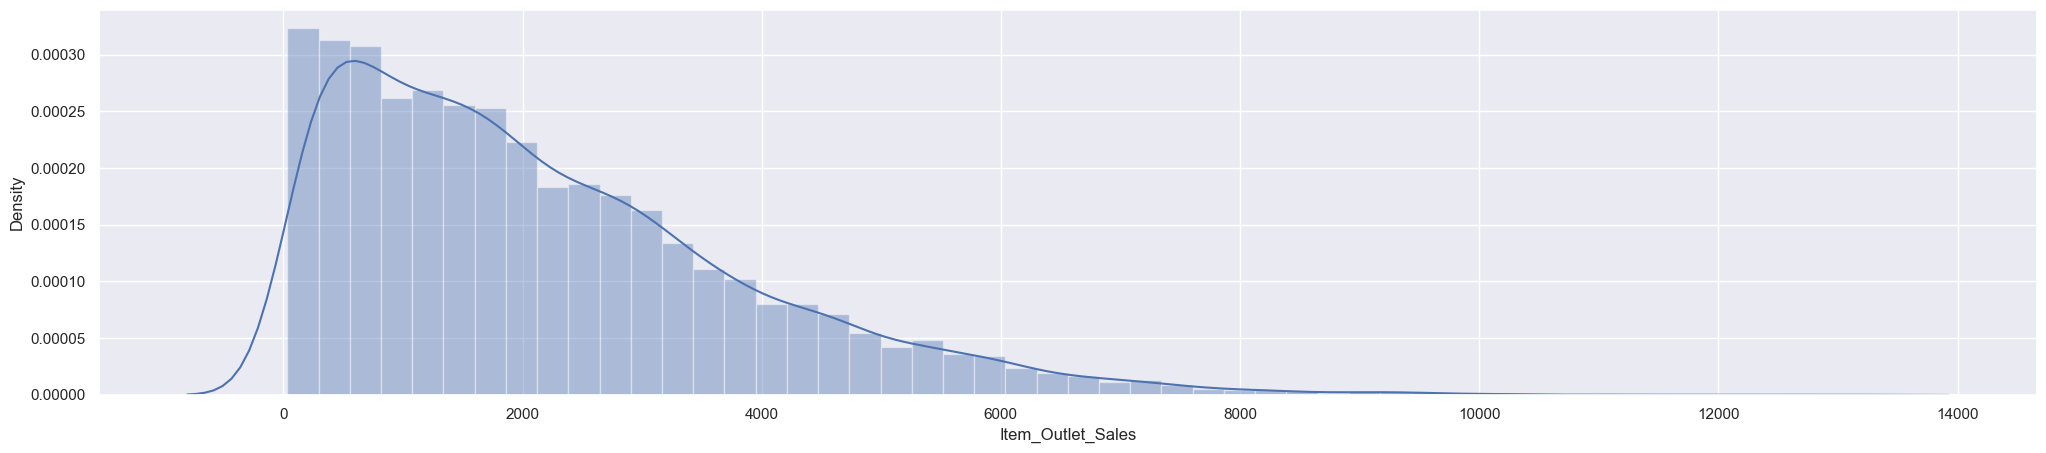

In [331]:
plt.figure(figsize=(25,5))
sns.distplot(Numerical_type.Item_Outlet_Sales)

<AxesSubplot:title={'center':'Item Weight Vs Item Outlet Sales'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

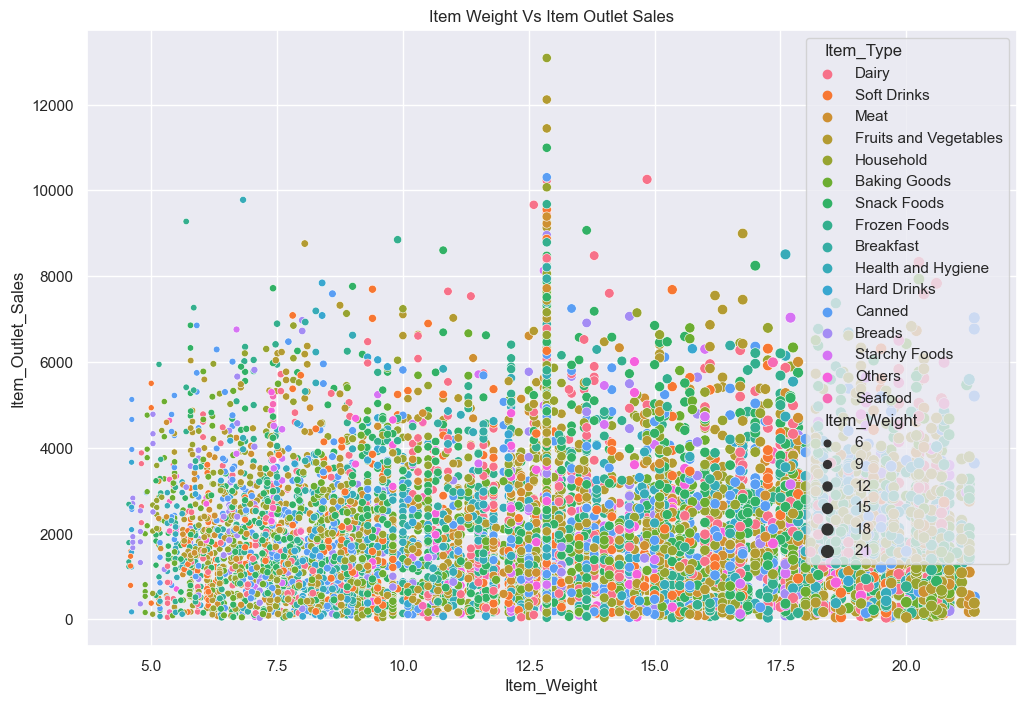

In [332]:
plt.figure(figsize=(12,8))
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.title('Item Weight Vs Item Outlet Sales')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=data_train)

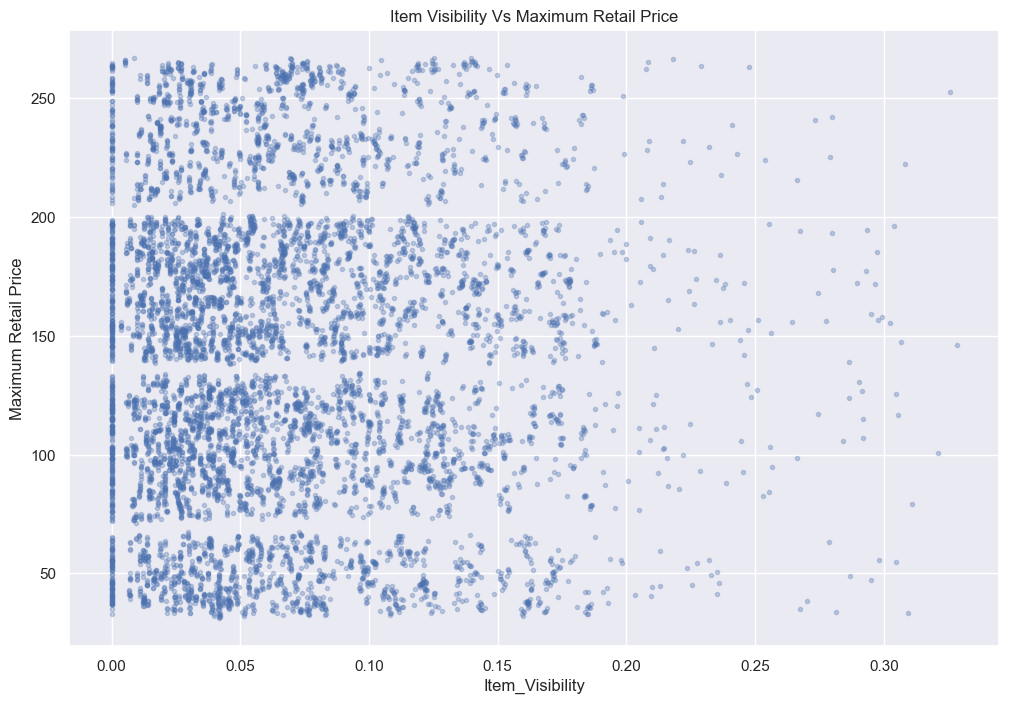

In [333]:
plt.figure(figsize=(12,8))
plt.ylabel('Maximum Retail Price')
plt.xlabel('Item_Visibility')
plt.title('Item Visibility Vs Maximum Retail Price')
plt.plot(data_train.Item_Visibility, data_train.Item_MRP, ".",alpha = 0.3)

Find relation between attrtibutes 

In [163]:
data_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


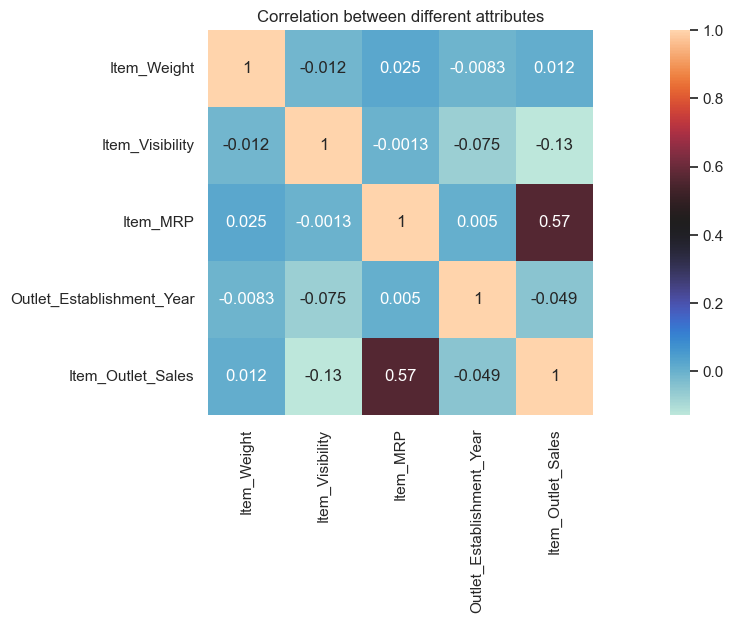

In [169]:
plt.figure(figsize=(20,5))
sns.heatmap(data_train.corr(),vmax=1, square=True,annot=True, cmap='icefire')
plt.title('Correlation between numerical attributes')
plt.show()

Spliting data

In [255]:
data_concat = pd.concat([categorical_type,Numerical_type],axis=1)
data_concat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,1,4,1,0,1,9.30,0.016047,249.8092,1999,3735.1380
1,2,14,1,2,2,5.92,0.019278,48.2692,2009,443.4228
2,1,10,1,0,1,17.50,0.016760,141.6180,1999,2097.2700
3,2,6,1,2,0,19.20,0.000000,182.0950,1998,732.3800
4,1,9,0,2,1,8.93,0.000000,53.8614,1987,994.7052


In [256]:
x = data_concat.drop(columns = ["Item_Outlet_Sales"],axis=1)
y = data_concat["Item_Outlet_Sales"]

In [208]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc= StandardScaler()

In [246]:
scaler = StandardScaler()
X = scaler.fit_transform(x)


In [247]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)


# Model Building

Linear Regression

In [291]:
lr=LinearRegression().fit(X_train,y_train)
y_prediction=lr.predict(X_test)
result_1=r2_score(y_test,y_prediction)

Decision Tree Regressor

In [292]:
dtr = DecisionTreeRegressor(max_depth = 3)
dtr.fit(X_train,y_train)
y_prediction = dtr.predict(X_test)
result_2 = r2_score(y_test,y_prediction)

Random Forest Regressor

In [293]:
rfr = RandomForestRegressor(max_depth = 3, n_estimators=500)
rfr.fit(X_train,y_train)
y_prediction = rfr.predict(X_test)
result_3 = r2_score(y_test,y_prediction)

XGBoost

In [294]:
xgb= XGBRegressor()
xgb.fit(X_train,y_train)
y_prediction=xgb.predict(X_test)
result_4 = r2_score(y_test,y_prediction)

Results

In [298]:
results= {'Model Name': ['linear Regression', 'Decision Tree','RandomForest', 'XGBoost'], 
                 'Result': [result_1, result_2, result_3, result_4]}
difference= pd.DataFrame(results)
difference

,Model Name,Result
0,linear Regression,0.522325
1,Decision Tree,0.519587
2,RandomForest,0.538962
3,XGBoost,0.532502


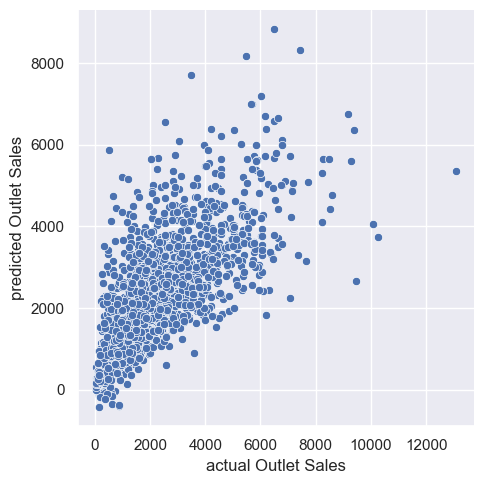

In [296]:
predict= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_prediction})
sns.relplot(data=predict, x='actual Outlet Sales', y='predicted Outlet Sales')

# Save models

In [297]:
file_name = 'model.pickle'
pickle.dump(difference, open(file_name, 'wb'))